In [3]:
import tensorflow as tf
from results.samuel.MobileNetV2_MC_advanced_decoder_2.custom import *
model_path = "results/samuel/MobileNetV2_MC_advanced_decoder_2/model.tf"
from load_data_predict import CustomDataGeneratorPredict

Number of samples:  3
Classes: [0 1]


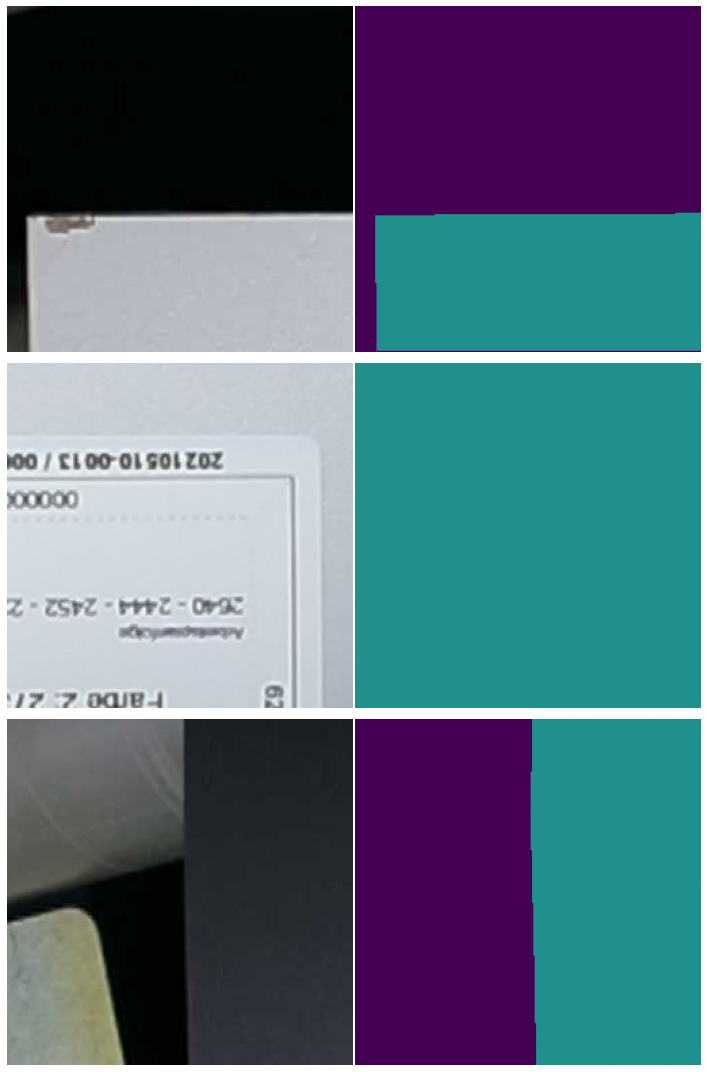

-1.0
1.0
0.0
1.0
[0 1]


In [2]:
img_dir = "PredImages/"
mask_dir = "PredLabels/"
image_extension = ".png"
mask_extension = ".png"
horizontal_split = 12
vertical_split = 1
data_list = [["ckokey6vd002b3g68q5mmclyi", 3, 0],
                    ["ckoklbzlb06qe3g688yq4w56s", 7, 0],
                    ["ckokf3nzs00473g68e456ksi3", 1, 0]]
# ###### Unet big pictures ########
# data_list = [["ckokey6vd002b3g68q5mmclyi", 0, 0],
#                     ["ckoklbzlb06qe3g688yq4w56s", 0, 0],
#                     ["ckokf3nzs00473g68e456ksi3", 0, 0]]

test = CustomDataGeneratorPredict(data_list, img_dir, mask_dir, horizontal_split, vertical_split, image_extension, mask_extension, preprocess_fcn, onelabel)

test.plot_batch()

img, mask = test.__getitem__()
print(img.min())
print(img.max())
print(mask.min())
print(mask.max())
print(test.classes)


In [4]:
model = tf.keras.models.load_model(model_path, custom_objects={"dice_metric": dice_metric, "jaccard_distance_loss": jaccard_distance_loss})
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 128, 128, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 128, 128, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 128, 128, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

1/1 [==============================] - 3s 3s/step


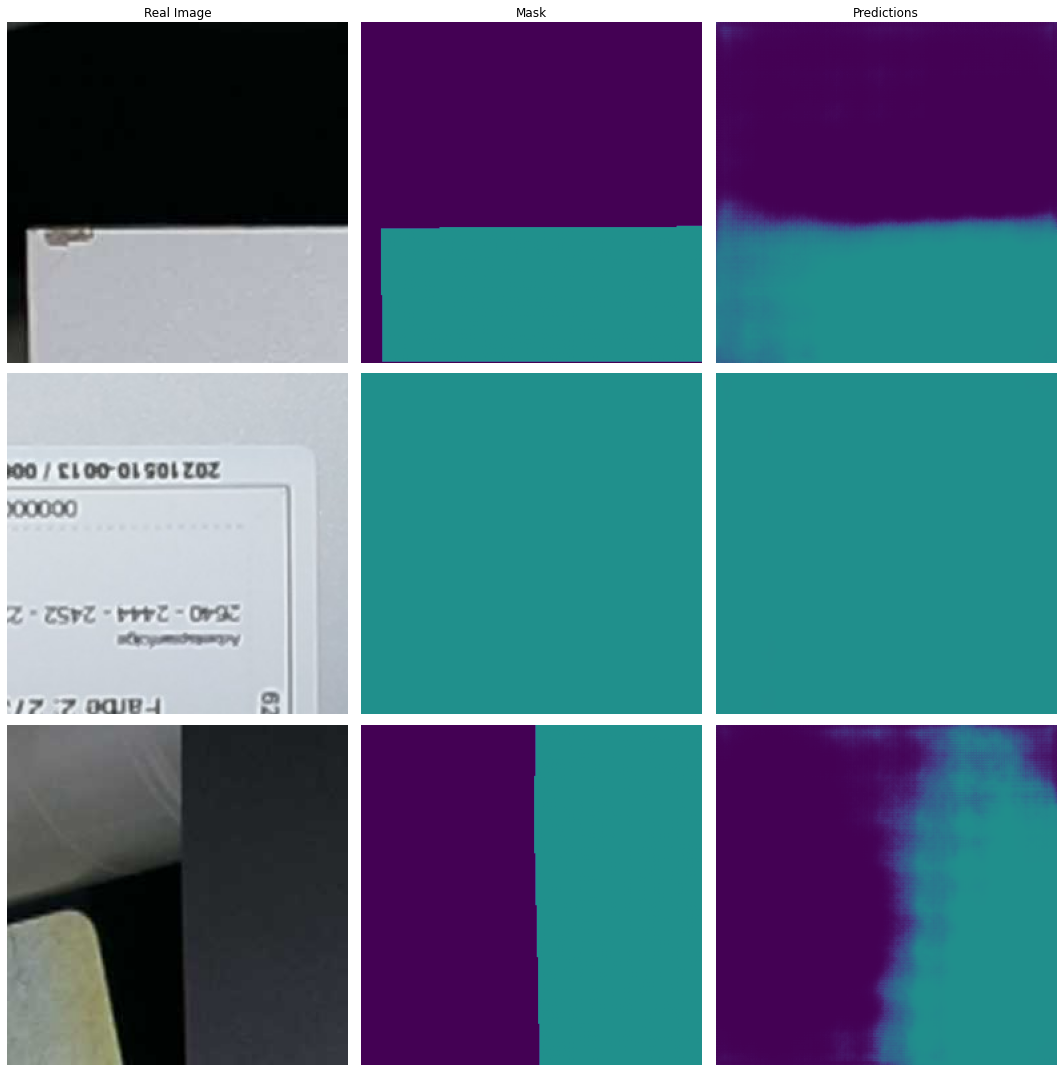

In [4]:
preds = model.predict(x=img, verbose=1)

test.plot_prediction(preds)

In [5]:
output_path = "plots/predictions/advanced_decoder/SC"
network_name = "MobileNetV2_SC_advanced_decoder_2"
test.save_batch(output_path, net_name=network_name, predictions=preds)